In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from scipy.stats import norm
from scipy import stats
df=pd.read_csv("./data/steam.csv")

Problématique : Le prix d'un jeu vidéo a-t-il une influence significative et systématique sur les ventes de ce dernier ?

## Partie 1

In [2]:
#On lance le csv pour voir si le chargement est fonctionnel
dfp=pd.read_csv("./data/steam.csv",usecols = ['appid','name','release_date','owners','price'])
dfp.head(5)


,appid,name,release_date,owners,price
0,10,Counter-Strike,2000-11-01,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,5000000-10000000,3.99


In [3]:
#On describe pour voir s'il existe des données aberrantes
dfp.describe()


,appid,price
count,2.707500e+04,27075.000000
mean,5.962035e+05,6.078193
std,2.508942e+05,7.874922
min,1.000000e+01,0.000000
25%,4.012300e+05,1.690000
50%,5.990700e+05,3.990000
75%,7.987600e+05,7.190000
max,1.069460e+06,421.990000


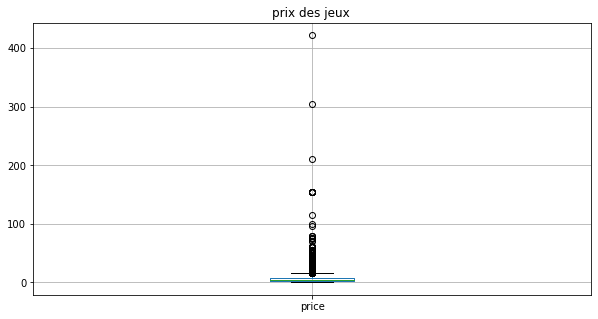

In [4]:
#On remarque que le maximum en prix se trouve à 400 $, qui est loin de la moyenne des prix des jeux. On fait donc une boite à moustache pour pouvoir voir le nombre d'aberration
plt.figure(figsize=(10,5))
dfp.boxplot(column='price')
plt.title("prix des jeux ")

plt.show()

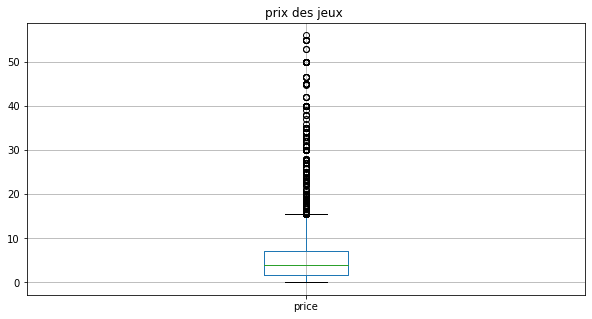

In [5]:
#On remarque qu'il existe quelques jeuc à plus de 80$, qui est le maximum de prix standard, on va donc nettoyer le dataset de ces données

indexNames = dfp[ (dfp['price'] >= 60)].index
dfp.drop(indexNames , inplace=True)

plt.figure(figsize=(10,5))
dfp.boxplot(column='price')
plt.title("prix des jeux ")

plt.show()

In [6]:

dfp[['min_o','max_o']]=(dfp['owners'].str.split('-',1,expand=True))
dfp[['min_o','max_o']]=dfp[['min_o','max_o']].astype(int)

dfp.head(5)

,appid,name,release_date,owners,price,min_o,max_o
0,10,Counter-Strike,2000-11-01,10000000-20000000,7.19,10000000,20000000
1,20,Team Fortress Classic,1999-04-01,5000000-10000000,3.99,5000000,10000000
2,30,Day of Defeat,2003-05-01,5000000-10000000,3.99,5000000,10000000
3,40,Deathmatch Classic,2001-06-01,5000000-10000000,3.99,5000000,10000000
4,50,Half-Life: Opposing Force,1999-11-01,5000000-10000000,3.99,5000000,10000000


In [7]:
dfp['owners']=dfp['max_o']-dfp['min_o']
dfp.head(5)

,appid,name,release_date,owners,price,min_o,max_o
0,10,Counter-Strike,2000-11-01,10000000,7.19,10000000,20000000
1,20,Team Fortress Classic,1999-04-01,5000000,3.99,5000000,10000000
2,30,Day of Defeat,2003-05-01,5000000,3.99,5000000,10000000
3,40,Deathmatch Classic,2001-06-01,5000000,3.99,5000000,10000000
4,50,Half-Life: Opposing Force,1999-11-01,5000000,3.99,5000000,10000000


In [8]:
%matplotlib notebook

In [9]:
std = np.std(dfp.price, ddof=1)
mean = np.mean(dfp.price)
domain = np.linspace(np.min(dfp.price),np.max(dfp.price))
plt.plot(domain,norm.pdf(domain,mean,std))
plt.hist(dfp.price,edgecolor = 'black',bins=60, alpha = 0.5,density=True)
plt.xlabel('prix des jeux')
plt.ylabel('densité')
plt.show()

<IPython.core.display.Javascript object>

In [10]:
plt.figure(figsize=(10,5))
dfp.boxplot(column='owners')
plt.title("nb joueurs ")

plt.show()

<IPython.core.display.Javascript object>

In [11]:
#On verifie si la date possede le bon type
dfp.release_date.dtype

dtype('O')

In [12]:
#On transforme donc la colonne en datetype
dfp['release_date'] = pd.to_datetime(dfp['release_date'])
print(dfp['release_date'])

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
27070   2019-04-24
27071   2019-04-23
27072   2019-04-24
27073   2019-04-17
27074   2019-04-24
Name: release_date, Length: 27045, dtype: datetime64[ns]


In [13]:
import seaborn as sns
dataStorecorr = dfp[['owners', 'price','max_o','min_o']]
dataStorecorr.corr()

,owners,price,max_o,min_o
owners,1.000000,0.041029,0.997674,0.990174
price,0.041029,1.000000,0.040006,0.038724
max_o,0.997674,0.040006,1.000000,0.997403
min_o,0.990174,0.038724,0.997403,1.000000


In [14]:
plt.figure(figsize = (8, 8))
sns.heatmap(dataStorecorr.corr(), annot = True, cmap = "coolwarm")

<IPython.core.display.Javascript object>

In [15]:
dfp['price'].min()

0.0

In [16]:
indexNames = dfp[ (dfp['price'] == 0)].index
dfp.drop(indexNames , inplace=True)
dataStorecorr = dfp[['owners', 'price','max_o','min_o']]
dataStorecorr.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(dataStorecorr.corr(), annot = True, cmap = "coolwarm")


<IPython.core.display.Javascript object>

## Partie 2

In [17]:
from sklearn import datasets, linear_model
x = dfp[['price']]
y = dfp['owners']
regr = linear_model.LinearRegression()

regr.fit(x, y)
pred = regr.predict(x)
plt.scatter(x, y,  color='black')
plt.plot(x, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Partie 3

<IPython.core.display.Javascript object>


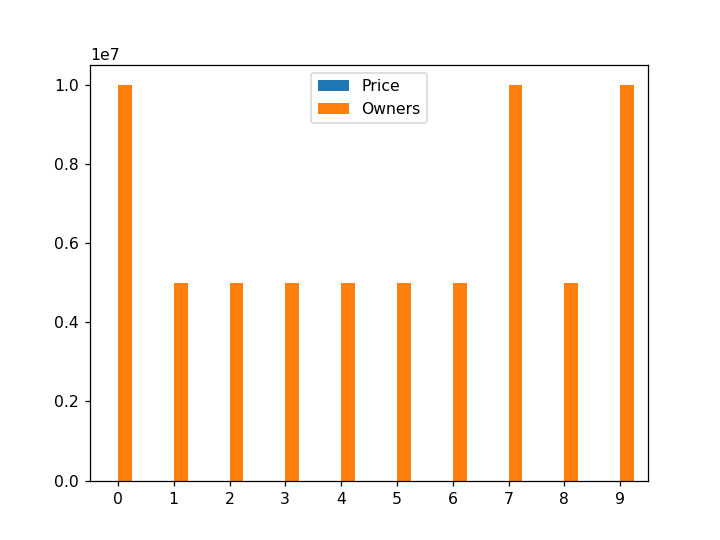

In [20]:
price= [dfp.price[0],dfp.price[1],dfp.price[2],dfp.price[3],dfp.price[4],dfp.price[5],dfp.price[6],dfp.price[7],dfp.price[8],dfp.price[9]]
owners = [dfp.owners[0],dfp.owners[1],dfp.owners[2],dfp.owners[3],dfp.owners[4],dfp.owners[5],dfp.owners[6],dfp.owners[7],dfp.owners[8],dfp.owners[9]]
idx = [0,1,2,3,4,5,6,7,8,9]
df = pd.DataFrame({"Price" : price,
                 "Owners" : owners}, index = idx)

ax = df.plot.bar(rot=0)

## Partie 4